In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

observe the dataset

In [3]:
df = pd.read_csv("/content/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
print(f''' number of rows {df.shape[0]}
      number of columns: {df.shape[1]}''')


 number of rows 200
      number of columns: 4


In [5]:
df.isna().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'correlation among the variables')

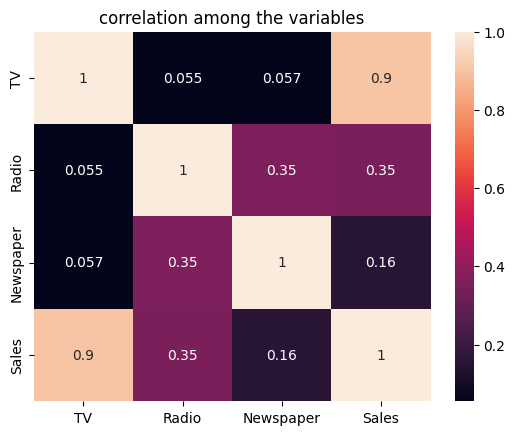

In [6]:
sns.heatmap(df.corr(),annot=True,fmt='.2g')
plt.title('correlation among the variables')


Text(0, 0.5, 'values')

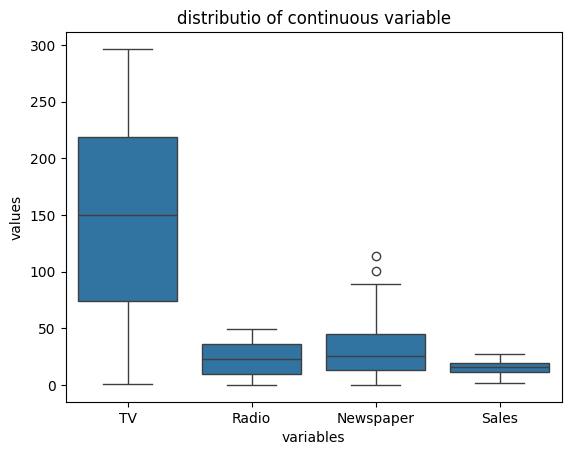

In [7]:
sns.boxplot(df.melt(value_vars=df.columns),x='variable',y='value')
plt.title('distributio of continuous variable')
plt.xlabel('variables')
plt.ylabel('values')

data preparation

In [10]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)
print(f'''x Train: {x_train.shape}
      X Test:{x_test.shape}
      y Train:{y_train.shape}
      y test:{y_test.shape}''')

x Train: (160, 3)
      X Test:(40, 3)
      y Train:(160,)
      y test:(40,)


In [14]:
#preprocessing
preprocess = Pipeline([
    ('scaler',StandardScaler())
])
#model
model = Pipeline([('preprocess',preprocess),
                  ('regressor', RandomForestRegressor())])
model.fit(x_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [16]:
#prediction
y_pred = model.predict(x_test)
print(f'Testing Accuracy: {round(100*r2_score(y_test,y_pred),2)}%')

Testing Accuracy: 94.24%


In [18]:
with open ('./model.pkl','wb') as fp:
  pickle.dump(model,fp)